TESTE DE HOMOGENEIDADE DE BARTLETT

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Escolha uma opção (1 - (banco de dados) ou 2 - (dados aleatorios)): 2
3.841458820694124
As amostras sao homogeneas


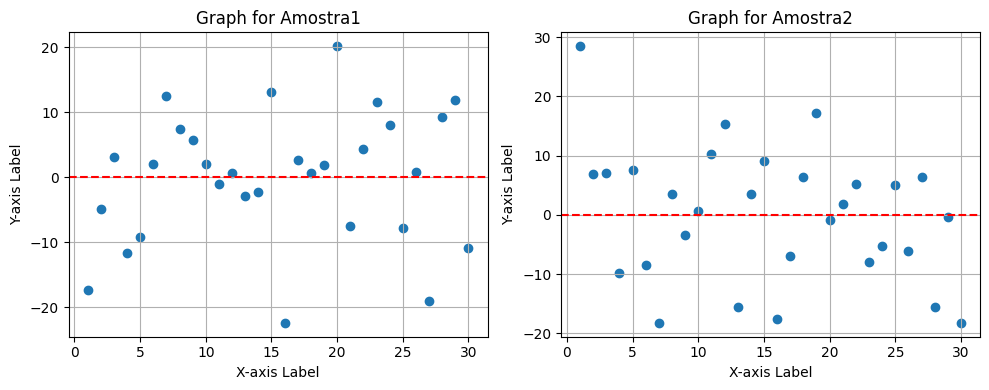

In [ ]:
'''
TESTE DE HOMOGENEIDADE DE BARTLETT
As variancias das populacionais de k amostras sejam iguais
Implementacao do testes χ2 de Bartlett (1937),
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #para legendas manuais
import math
import scipy.stats as st
import random

class bartlettTest:
    def __init__(self, data_filename, amostras, variavel):
        #amostras - coluna das amostras a serem comparadas (como fatores aqui)
        #variavel - a variavel a ser testada entre amostras
        self.variavel = variavel # a variavel seria a mesma do target
        self.categorias = amostras # aqui temos as categorias de divisão da targetq ue sao as varias amostras
        self.df = pd.read_csv(data_filename)
        self.k = self.df[self.categorias].nunique() # k e o numero de tratamentos (amostras)
        self.n = self.df.groupby(self.categorias).size()# eh o tamanho de cada amostra
        self.N = sum(self.n) # tamanho total
        self.runTest()

    def runTest(self):

        #calculando o q
        variancia = self.df.groupby(self.categorias)[self.variavel].var()
        Sp2 = sum((self.n-1)*variancia)/(self.N-self.k)
        q = (self.N-self.k)*np.log(Sp2)-(sum((self.n-1)*np.log(variancia)))
        #calculando o c
        c = 1+(1/(3*(self.k-1)))*(sum((1/(self.n-1))-(1/(self.N-self.k))))
       #Bcalculado
        Bcalc = q/c
        Bcritico = st.chi2.ppf(0.95, self.k-1)
        print(Bcritico)

        if(Bcalc > Bcritico):
            print("As amostras nao sao homogeneas")
        else:
            print("As amostras sao homogeneas")

    def graficos(self):
      import statsmodels.api as sm
      medias_grupo = self.df.groupby(self.categorias)[self.variavel].mean()
      # Group your DataFrame by the 'category' variable
      grouped = self.df.groupby(self.categorias)
      # Crie uma nova coluna chamada 'diferenca' que armazenará a diferença entre cada ponto e a média do grupo
      self.df['diferenca'] = grouped[self.variavel].transform(lambda x: x - x.mean())

      # Crie a sequência de 1 até n (sendo o n o tamanho de cada amostra)
      sequencia = np.arange(1, self.n[1]+1)

      # Iterate through the groups and create separate graphs
      fig, axes = plt.subplots(1, len(grouped), figsize=(10, 4))  # 1 row, len(grouped) columns

      for i, (name, group) in enumerate(grouped):
                ax = axes[i]  # Get the current axis
                ax.scatter(sequencia,group['diferenca'])  # Replace 'your_variable' with the variable you want to plot
                ax.set_title(f'Graph for {name}')
                ax.set_xlabel('X-axis Label')
                ax.set_ylabel('Y-axis Label')
                ax.axhline(y=0, color='red', linestyle='--', label='y = 2')
                ax.grid(True)

      plt.tight_layout()  # Adjusts the spacing between subplots
      plt.show()



if __name__ == "__main__":

# vou rodar aqui 2 casos, o de nao homogeneidade (fornecido pelo professor) e um homogeneo, que tirei de uma mesma amostra aleatoria e dividi em 3, posso dividir em 2 tbm, o que quiser
  def choice(opcao):
    if opcao == 1:
        df = '/content/gdrive/MyDrive/Colab Notebooks/dataLojas.csv'
        bt = bartlettTest(df, "Loja", "Nclientes")
        bt.graficos()
    elif opcao == 2:
        mu = 30
        sd = 10
        num_samples = 60
        valor = np.random.normal(mu, sd, size=num_samples)
        categ = ['Amostra1', 'Amostra2'] * 30 # dividindo 2 amostras da mesma populacao  para serem as categorias (podem ser mais amostras)
        randompd = pd.DataFrame({'Categorias': categ,'Variavel': valor})#, 'Categorias': categ
        randompd.to_csv('/content/gdrive/MyDrive/Colab Notebooks/randompd.csv', index=False)
        df = '/content/gdrive/MyDrive/Colab Notebooks/randompd.csv'
        bt = bartlettTest(df, "Categorias", "Variavel")
        bt.graficos()
    else:
        # Lidar com opções inválidas
        print("Opção inválida. Escolha 1 ou 2.")

# Exemplo de uso:
opcao = int(input("Escolha uma opção (1 - (banco de dados) ou 2 - (dados aleatorios)): "))
choice(opcao)
